In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [3]:
from ISLP import load_data

In [33]:
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [4]:
Carseats = load_data("Carseats")
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [26]:
Carseats.shape

(400, 11)

In [5]:
Carseats.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [6]:
np.sum(Carseats.isna())

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

# 10(a)

### Now for fitting a multiple regression model using Price, Urban and US. We need to do one-hot encoding for each predictor variables.

https://www.baeldung.com/cs/one-hot-encoding

for reading about one-hot encoding.

In [22]:
# Making our model matrix
y = Carseats["Sales"]
X = Carseats[["Price"]]
X, y

(     Price
 0      120
 1       83
 2       80
 3       97
 4      128
 ..     ...
 395    128
 396    120
 397    159
 398     95
 399    120
 
 [400 rows x 1 columns],
 0       9.50
 1      11.22
 2      10.06
 3       7.40
 4       4.15
        ...  
 395    12.57
 396     6.14
 397     7.41
 398     5.94
 399     9.71
 Name: Sales, Length: 400, dtype: float64)

We don't need to add No columns, since 0 means that

But above will create bias for Yes as 1, so we would add No columns per category

In [23]:
X

,Price
0,120
1,83
2,80
3,97
4,128
...,...
395,128
396,120
397,159
398,95


In [27]:
np.sum(Carseats[["Urban"]]=="Yes")

Urban    282
dtype: int64

In [28]:
X[["Urban_yes"]]=(Carseats[["Urban"]]=="Yes").astype(int)
X[["Urban_no"]]=(Carseats[["Urban"]]=="No").astype(int)
X[["US_yes"]]=(Carseats[["US"]]=="Yes").astype(int)
X[["US_no"]]=(Carseats[["US"]]=="No").astype(int)
X

C:\Users\user\AppData\Local\Temp\ipykernel_12892\1807636406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["Urban_yes"]]=(Carseats[["Urban"]]=="Yes").astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_12892\1807636406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["Urban_no"]]=(Carseats[["Urban"]]=="No").astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_12892\1807636406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Price,Urban_yes,Urban_no,US_yes,US_no
0,120,1,0,1,0
1,83,1,0,1,0
2,80,1,0,1,0
3,97,1,0,1,0
4,128,1,0,0,1
...,...,...,...,...,...
395,128,1,0,1,0
396,120,0,1,1,0
397,159,1,0,1,0
398,95,1,0,1,0


In [30]:
X["intercept"]=np.ones(X["Price"].shape[0])

C:\Users\user\AppData\Local\Temp\ipykernel_12892\1037410414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["intercept"]=np.ones(X["Price"].shape[0])


In [31]:
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.39e-23
Time:                        08:15:33   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_yes      3.3972      0.201     16.878      0.000       3.002       3.793
Urban_no       3.4192      0.210     16.265      0.000       3.006       3.832
US_yes         4.0085      0.201     19.893      0.000       3.612       4.405
US_no          2.8079      0.202     13.908      0.000       2.411       3.205
intercept      6.8164      0.309     22.043      0.000       6.208       7.424
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                     1.58e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.25e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
vals = [VIF(X, i) for i in range(X.shape[1]-1)]
vif = pd.DataFrame({"vif":vals}, index=X.columns[:-1])
vif

e:\Program Files\anaconda\envs\islp\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif
Price,1.005342
Urban_yes,inf
Urban_no,inf
US_yes,inf
US_no,inf


### Now making model matrix using ISLP package and using it to fit the model

In [39]:
X_new = MS(["Price", "Urban", "US"]).fit_transform(Carseats)
X_new

,intercept,Price,Urban[Yes],US[Yes]
0,1.0,120,1.0,1.0
1,1.0,83,1.0,1.0
2,1.0,80,1.0,1.0
3,1.0,97,1.0,1.0
4,1.0,128,1.0,0.0
...,...,...,...,...
395,1.0,128,1.0,1.0
396,1.0,120,0.0,1.0
397,1.0,159,1.0,1.0
398,1.0,95,1.0,1.0


In [43]:
result = sm.OLS(y, X_new)
result = result.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.39e-23
Time:                        08:24:27   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now high multi collinearity is not there, maybe because there are no "NO" columns

# 10(b)

1) intercept coeff, shows that without the town being in Urban or US and when Price is 0. Unit sales is 13.
2) As price charges increases, unit sales depreciates a little bit by a factor of 0.0545
3) If the town is urban, sales depreciates little bit by a factor of 0.0219
4) If the town is in US, sales increases by a factor of 1.2

# 10(c)

Written in Notes(tab)

# 10(d)

For intercept, price and US(yes), we can reject null hypothesis.

# 10(e)

Since, Urban follows null hypothesis, we can drop it

In [44]:
X_new1 = MS(["Price", "US"]).fit_transform(Carseats)
results_new = sm.OLS(y, X_new1).fit()
results_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.66e-24
Time:                        08:42:30   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 10(f)

They fit about the same, both are able to predict 23.9% of variance in the data acc. to R-squared.

# 10(g)

In [45]:
results_new.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


# 10(h)

In [47]:
outlier_test = results_new.outlier_test()
outlier_test["student_resid"]

0      0.732720
1      0.614266
2      0.076326
3     -0.627399
4     -0.775210
         ...   
395    2.166210
396   -0.629705
397    0.749780
398   -1.266235
399    0.818015
Name: student_resid, Length: 400, dtype: float64

In [50]:
infl = results_new.get_influence()

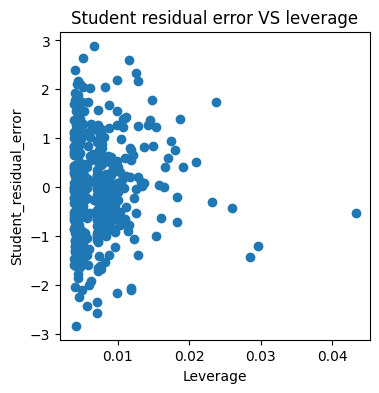

In [51]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(infl.hat_matrix_diag, outlier_test["student_resid"])
ax.set_xlabel("Leverage")
ax.set_ylabel("Student_residual_error")
ax.set_title("Student residual error VS leverage");

Therefore from above graph, we can say that there is an evidence of high leverage point in the above model.

since (p+1)/n = (2+1)/400 = 0.075 and >0.04 one greatly exceeds that.